<a href="https://colab.research.google.com/github/Men9UbilaMarka/GoogleColab/blob/main/PR17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №17

**Multiple Linear Regression**

Мы загружаем набор данных, который связан с расходом
топᴫива и выбросами угᴫекисᴫого газа автомобиᴫей. Затем мы раздеᴫяем наши данные на
обучающие и тестовые наборы, создаем модеᴫь с испоᴫьзованием обучающего набора,
оцениваем вашу модеᴫь с помощью тестового набора и, наконец, испоᴫьзуем модеᴫь дᴫя
прогнозирования неизвестного значения.

1. Загружаем необходимые библиотеки

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

2. Загружаем датасет

In [2]:
df = pd.read_csv("/content/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


3. Выводим нужные нам столбцы

In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',
'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


4. Строим график зависимостей выхлопов от размера двигателя.

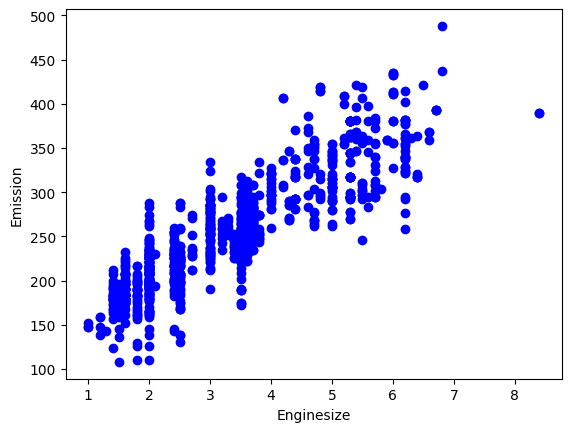

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,color='blue')
plt.xlabel("Enginesize")
plt.ylabel("Emission")
plt.show()

5. Создаем обучающий и тестовые наборы

In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

6. Визуализируем данные

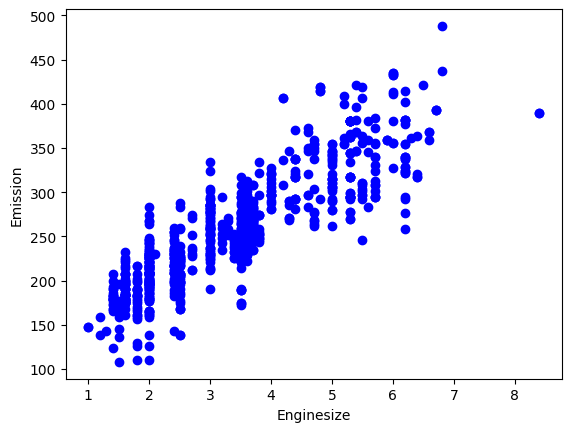

In [6]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color='blue')
plt.xlabel("Enginesize")
plt.ylabel("Emission")
plt.show()

7. Подключаем нужную библиотеку для подсчета коэффициентов

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
#Thecoefficients
print ('Coefficients:', regr.coef_)

Coefficients: [[10.01446946  7.55295726 10.02894737]]


8. Оценим регресию

In [9]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residualsumofsquares:%.2f"
% np.mean((y_hat - y) ** 2))
#Explainedvariancescore:1isperfectprediction
print('Variancescore:%.2f' % regr.score(x, y))

Residualsumofsquares:482.59
Variancescore:0.87


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**Вывод :** в данной практической работе была использована модель Multiple Linear Regression. Она используется, когда есть два или более независимых признака, влияющих на зависимую переменную, или же в качестве визуализации данных  является плоскость или гиперплоскость. Т. е. по сравнению с простой линейной регрессией, больше независимыми признаков (объем двигателя, кол-во цилиндров и т. д.) для предсказания зависимой переменной.
